# Linear ramp

## Ground-state of $H_C$

Data saved in the 'qfi_data' directory


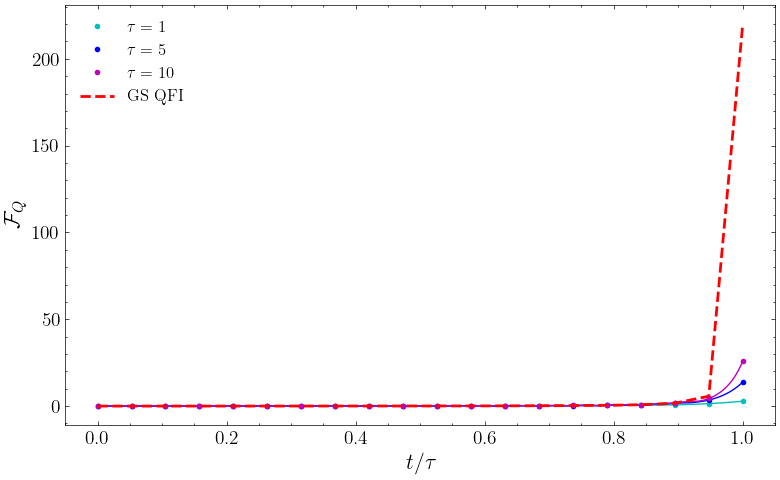

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy import special

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({
    "axes.labelsize": 16,    # x- and y-label size
    "axes.titlesize": 18,    # title size
    "xtick.labelsize": 14,   # x-tick label size
    "ytick.labelsize": 14,   # y-tick label size
    "legend.fontsize": 12,   # legend text size
})

dt = 0.01       
g0 = 100.0        # initial value of g(t)
g1 = 1        # final value of g(t)
theta0 = 0      # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation

def g_func(t, T):
    return g0 + (g1 - g0) * (t / T)

def construct_hamiltonian(j, theta, t, T):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t, T) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target, T):
    H0 = construct_hamiltonian(j, 0, 0, T)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]

    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t, T)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta, T):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta - 0.5*delta, t_target, T)
    psi_plus  = simulate_final_state(j, theta + 0.5*delta, t_target, T)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return np.real(qfi)

def qfi_victor(N, t, T):
    return N*(0.5*N+1) / g_func(t, T)**2

j = 10
N = 2 * j

#T_values = [10, 30, 50, 100]
#colors = ['c', 'b', 'm', 'k']

T_values = [1, 5, 10]
colors = ['c', 'b', 'm']
def f(t, T):
    g = (g1-g0)/T
    return 0.5*N*(0.5*N+1)*np.pi/np.abs(g)*np.abs(special.erf(np.sqrt(1j/(2*g))*1j*(g*t+g0))-special.erf(np.sqrt(1j/(2*g))*1j*g0))**2

plt.figure(figsize=(8, 5))
tau_values = np.linspace(0, 1, 20) 
tau_values_ana = np.linspace(0, 1, 20000) 

import os

# Create a directory to store the data if it doesn't exist
data_dir = 'qfi_data'
os.makedirs(data_dir, exist_ok=True)

print("Data saved in the 'qfi_data' directory")

for i, T_val in enumerate(T_values):
    qfi_analytical = [f(t * T_val, T_val) for t in tau_values_ana]
    filename = os.path.join(data_dir, f'qfi_ana_linearHc_T{T_val}.npy')
    np.save(filename, qfi_analytical)
    plt.plot(tau_values_ana, qfi_analytical, color=colors[i])

for i, T_val in enumerate(T_values):
    qfi_dyn = []
    for tau in tau_values:
        t = tau * T_val  # Convert normalized time to actual time
        qfi_val = compute_qfi_second_order_fidelity(j, theta0, t, delta, T_val)
        qfi_dyn.append(qfi_val)
    filename = os.path.join(data_dir, f'qfi_dyn_linearHc_T{T_val}.npy')
    np.save(filename, qfi_dyn)
    plt.plot(tau_values, qfi_dyn, color=colors[i], marker='.', linestyle = 'None', label=f'$ \\tau = {T_val}$')

T_victor = 550
qfi_victor_vals = []
for tau in tau_values:
    t = tau * T_victor
    qfi_victor_vals.append(qfi_victor(N, t, T_victor))
plt.plot(tau_values, qfi_victor_vals, 'r--', linewidth=2, label="GS QFI")

#qfis = [f(t*tau) for t in t_values]
#plt.plot(tau_values, qfis, 'g.', label='Analytical result')
plt.xlabel(r'$t/\tau$')
plt.ylabel(r"$\mathcal{F}_Q$")
#plt.xscale('function', functions=(lambda x: np.power(x,2), lambda x: np.power(x, 1/2)))
#plt.yscale('log')
#plt.ylim(10,None)
#plt.title("Dynamic QFI vs. Normalized Time")
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("qfihclinear.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
# Initialize arrays to store all data
all_data = {
    'tau_values': [],
    'T_values': [],
    'qfi_values': [],
    't_values': []
}

# Create arrays to store the curves for each tau
data_per_tau = {}

# Data Collection in the Loop

Add the following code inside your loop to collect data for each iteration. This should be placed at the appropriate points in your loop where the values are calculated:

In [ ]:
# Inside your tau loop, after calculating the values for each iteration:

# Store the current tau data
data_per_tau[tau] = {
    'time': t_values,  # Your time array for this tau
    'qfi': qfi_values,  # Your QFI values for this tau
    'other_relevant_values': other_values  # Any other values you want to save
}

# Append to the all_data arrays
all_data['tau_values'].append(tau)
all_data['T_values'].append(T_values)
all_data['qfi_values'].append(qfi_val)
all_data['t_values'].append(t)

# Note: Replace t_values, qfi_values, other_values with your actual variable names

## Ground-state of $H$

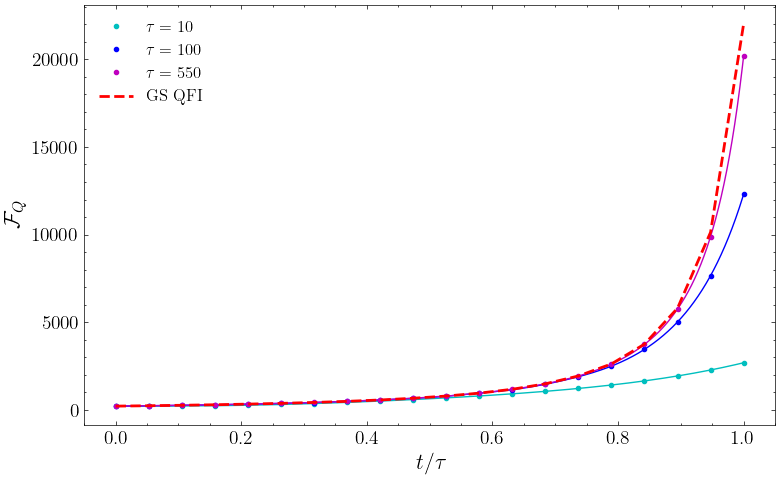

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy import special

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1.0        # initial value of g(t)
g1 = 0.1        # final value of g(t)
theta0 = 0      # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation

##############################################################################
# Define functions with T as a parameter
##############################################################################
def g_func(t, T):
    return g0 + (g1 - g0) * (t / T)

def construct_hamiltonian(j, theta, t, T):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t, T) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target, T):
    # Initial Hamiltonian at t = 0 and its ground state
    H0 = construct_hamiltonian(j, theta, 0, T)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]  # ground state

    # Evolve from t = 0 to t_target
    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t, T)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta, T):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta - 0.5*delta, t_target, T)
    psi_plus  = simulate_final_state(j, theta + 0.5*delta, t_target, T)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return np.real(qfi)

def qfi_victor(N, t, T):
    return N*(0.5*N+1) / g_func(t, T)**2

##############################################################################
# Main calculation and plotting using normalized time tau = t/T
##############################################################################
j = 10
N = 2 * j

# Total evolution times to consider
T_values = [10, 100, 550]
colors = ['c', 'b', 'm']  # Colors for dynamic QFI curves

def f(t, T):
    g = (g1-g0)/T
    #return N**2*np.pi/(4*np.abs(g))*np.abs(special.erf(np.sqrt(1j/(2*g))*1j*(g*t+g0))-special.erf(np.sqrt(1j/(2*g))*1j*g0))**2
    return 8*np.abs(0.5*np.sqrt(0.5*N*(0.5*N+1))*np.sqrt(np.pi/(2*1j*g))*np.exp(-0.5*1j*g*t**2)*np.exp(-1j*g0**2/(2*g))*(special.erf(np.sqrt(1j/(2*g))*1j*(g*t+g0))-special.erf(np.sqrt(1j/(2*g))*1j*g0))-0.5*np.sqrt(0.5*N*(0.5*N+1))/g0*np.exp(-0.5*1j*g*t**2))**2
plt.figure(figsize=(8, 5))
tau_values = np.linspace(0, 1, 20)  # Normalized time from 0 to 1
tau_values_ana = np.linspace(0, 1, 20000)  # Higher resolution for analytical plot

import os

# Create a directory to store the data if it doesn't exist
data_dir = 'qfi_data'
os.makedirs(data_dir, exist_ok=True)

for i, T_val in enumerate(T_values):
    qfi_analytical = [f(t * T_val, T_val) for t in tau_values_ana]
    filename = os.path.join(data_dir, f'qfi_ana_linearH_T{T_val}.npy')
    np.save(filename, qfi_analytical)
    plt.plot(tau_values_ana, qfi_analytical, color=colors[i])

# Compute and plot dynamic QFI for each T as a function of tau = t/T
for i, T_val in enumerate(T_values):
    qfi_dyn = []
    for tau in tau_values:
        t = tau * T_val  # Convert normalized time to actual time
        qfi_val = compute_qfi_second_order_fidelity(j, theta0, t, delta, T_val)
        qfi_dyn.append(qfi_val)
    filename = os.path.join(data_dir, f'qfi_dyn_linearH_T{T_val}.npy')
    np.save(filename, qfi_dyn)
    plt.plot(tau_values, qfi_dyn, color=colors[i], marker='.', linestyle = 'None', label=f'$ \\tau = {T_val}$')

# Compute and plot Victor's QFI (using T = 500) as a function of normalized time
T_victor = 550
qfi_victor_vals = []
for tau in tau_values:
    t = tau * T_victor
    qfi_victor_vals.append(qfi_victor(N, t, T_victor))
plt.plot(tau_values, qfi_victor_vals, 'r--', linewidth=2, label="GS QFI")

plt.xlabel(r'$t/\tau$')
plt.ylabel(r"$\mathcal{F}_Q$")
#plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig("qfihlinear.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Exponential ramp

## Ground-state of $H_C$

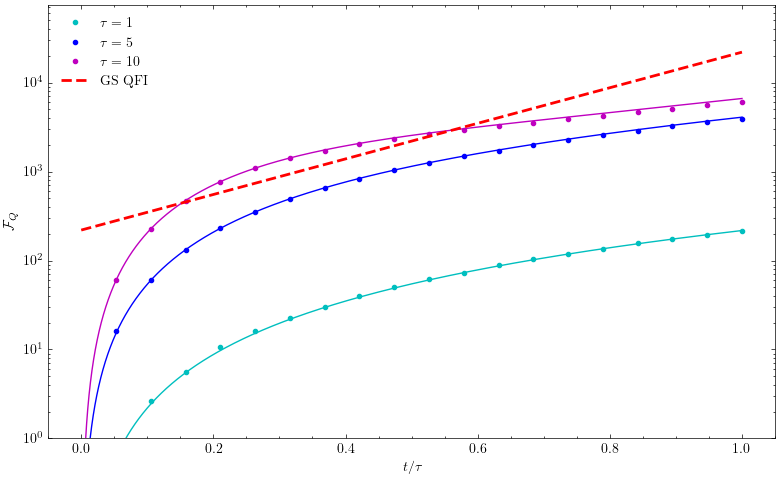

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy import special

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1.0        # initial value of g(t)
g1 = 0.1        # final value of g(t)
theta0 = 0      # central value of the parameter theta
delta = 1e-2    # finite difference for the QFI calculation
a = -1/(np.log(g1/g0))

##############################################################################
# Define functions with T as a parameter
##############################################################################
def g_func(t, T):
    return g0 * np.exp(-t / (a*T))

def construct_hamiltonian(j, theta, t, T):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t, T) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target, T):
    # Initial Hamiltonian at t = 0 and its ground state
    H0 = construct_hamiltonian(j, 0, 0, T)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]  # ground state

    # Evolve from t = 0 to t_target
    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t, T)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta, T):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta - 0.5*delta, t_target, T)
    psi_plus  = simulate_final_state(j, theta + 0.5*delta, t_target, T)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return np.real(qfi)

def qfi_victor(N, t, T):
    return N*(0.5*N+1) / g_func(t, T)**2
    #23596010685223

def f(t, tau):
    Ei_full = special.expi(-1j * a * g0 * tau)
    Ei_cut  = special.expi(-1j * a * np.exp(-t/(a*tau)) * g0 * tau)
    core = -1j * a * np.exp(1j * a * np.exp(-t/(a*tau)) * g0 * tau) * tau * (Ei_full - Ei_cut)
    return N*(0.5*N+1) * np.abs(core)**2    
##############################################################################
# Main calculation and plotting using normalized time tau = t/T
##############################################################################
j = 10
N = 2 * j

# Total evolution times to consider
T_values = [1,5,10]
#T_values = [10, 100, 250]
colors = ['c', 'b', 'm']  # Colors for dynamic QFI curves

import os

# Create a directory to store the data if it doesn't exist
data_dir = 'qfi_data'
os.makedirs(data_dir, exist_ok=True)

plt.figure(figsize=(8, 5))
tau_values = np.linspace(0, 1, 20)  # Normalized time from 0 to 1
tau_values_ana = np.linspace(0, 1, 20000)  # Higher resolution for analytical plot

for i, T_val in enumerate(T_values):
    qfi_analytical = [f(t * T_val, T_val) for t in tau_values_ana]
    filename = os.path.join(data_dir, f'qfi_ana_expHc_T{T_val}.npy')
    np.save(filename, qfi_analytical)
    plt.plot(tau_values_ana, qfi_analytical, color=colors[i])

# Compute and plot dynamic QFI for each T as a function of tau = t/T
for i, T_val in enumerate(T_values):
    qfi_dyn = []
    for tau in tau_values:
        t = tau * T_val  # Convert normalized time to actual time
        qfi_val = compute_qfi_second_order_fidelity(j, theta0, t, delta, T_val)
        qfi_dyn.append(qfi_val)
    filename = os.path.join(data_dir, f'qfi_dyn_expHc_T{T_val}.npy')
    np.save(filename, qfi_dyn)
    plt.plot(tau_values, qfi_dyn, color=colors[i], marker='.', linestyle = 'None', label=f'$ \\tau = {T_val}$')

# Compute and plot Victor's QFI (using T = 500) as a function of normalized time
T_victor = 10
qfi_victor_vals = []
for tau in tau_values:
    t = tau * T_victor
    qfi_victor_vals.append(qfi_victor(N, t, T_victor))
plt.plot(tau_values, qfi_victor_vals, 'r--', linewidth=2, label="GS QFI")

#bounds = [N**2*t**2 for t in t_values]
plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
#plt.title(r"Exponential ramp for $g_0 = 1$ and $g_1 = 0.1$")
plt.yscale('log')
plt.ylim([1, None])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("qfiHcexplog.pdf", format="pdf", bbox_inches="tight")
plt.show()

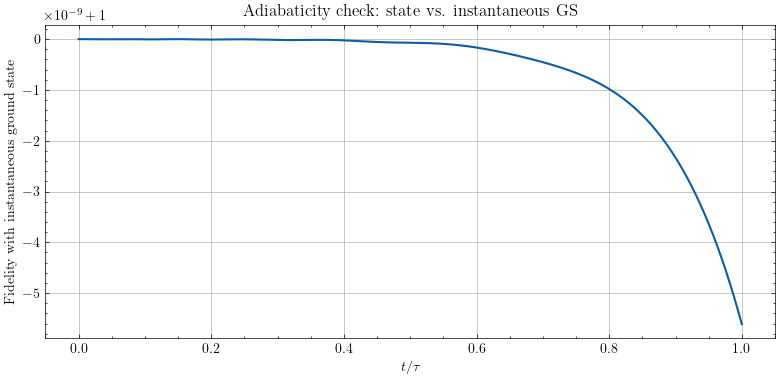

In [6]:
t_final = 100.0
def instantaneous_ground_state(j, theta, t):
    """Return the ground state of H(t) at parameter theta."""
    H_t = construct_hamiltonian(j, theta, t, t_final)
    eigvals, eigvecs = H_t.eigenstates()
    return eigvecs[0]

def fidelity_vs_instantaneous_ground(j, theta, t_target):
    """
    Evolve the initial ground state under H(t) from t=0 to t_target,
    and compute fidelity at each time against the instantaneous ground state.
    """
    # prepare time grid
    times = np.arange(0, t_target + dt, dt)

    # initial ground state at t=0
    psi0 = instantaneous_ground_state(j, theta, 0)

    # set up H(t) callback for mesolve
    def H_time(t, args):
        return construct_hamiltonian(j, theta, t, t_final)

    # evolve
    result = qt.mesolve(H_time, psi0, times, [], args={})
    evolved_states = result.states

    # compute fidelities
    fidelities = []
    for psi_t, t in zip(evolved_states, times):
        psi_gs = instantaneous_ground_state(j, theta, t)
        fid = np.abs(psi_gs.overlap(psi_t))**2
        fidelities.append(fid)

    return times, fidelities

# --- And then in your “Main calculation” section, for a chosen t_final: ---
times, fidelities = fidelity_vs_instantaneous_ground(j=0.5*N, theta=delta*0.5, t_target=t_final)

# Plot it
plt.figure(figsize=(8,4))
plt.plot(times / t_final, fidelities, lw=1.5)
plt.xlabel(r"$t/\tau$")
plt.ylabel("Fidelity with instantaneous ground state")
plt.title("Adiabaticity check: state vs. instantaneous GS")
#plt.ylim(0.98, 1.02)
plt.grid(True)
plt.tight_layout()
plt.show()

#times = np.arange(0, t_final + dt, dt)

#psi0 = instantaneous_ground_state(j, delta, 0)

#def H_time(t, args):
#    return construct_hamiltonian(j, delta, t, t_final)

    # evolve
#result = qt.mesolve(H_time, psi0, times, [], args={})
#evolved_states = result.states

#for t in times:
#    print(instantaneous_ground_state(j, delta, t))

#print(evolved_states)

## Ground-state of $H$

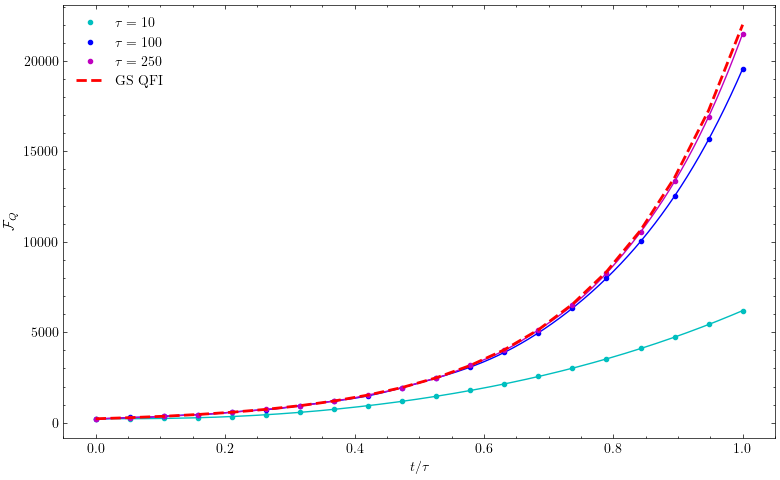

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy.special import expi

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1.0        # initial value of g(t)
g1 = 0.1        # final value of g(t)
theta0 = 0      # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
a = -1/(np.log(g1/g0))

##############################################################################
# Define functions with T as a parameter
##############################################################################
def g_func(t, T):
    return g0 * np.exp(-t / (a*T))

def construct_hamiltonian(j, theta, t, T):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t, T) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target, T):
    # Initial Hamiltonian at t = 0 and its ground state
    H0 = construct_hamiltonian(j, theta, 0, T)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]  # ground state

    # Evolve from t = 0 to t_target
    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t, T)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta, T):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta - 0.5*delta, t_target, T)
    psi_plus  = simulate_final_state(j, theta + 0.5*delta, t_target, T)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return np.real(qfi)

def qfi_victor(N, t, T):
    return N*(0.5*N+1) / g_func(t, T)**2

def f(t, tau):
    # Compute inner terms
    exp_factor = np.exp(-t / (a * tau))
    E1 = expi(-1j * a * g0 * tau)
    E2 = expi(-1j * a * exp_factor * g0 * tau)
    
    term1 = - (1j * 0.5*np.sqrt(0.5*N*(0.5*N+1))) * a * np.exp(1j * a * exp_factor * g0 * tau) * tau * (E1 - E2)
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / g0 * np.exp(-1j * a * (1 - exp_factor) * g0 * tau)
    
    return 8.0 * np.abs(term1 + term2)**2

##############################################################################
# Main calculation and plotting using normalized time tau = t/T
##############################################################################
j = 10
N = 2 * j

# Total evolution times to consider
T_values = [10, 100, 250]
colors = ['c', 'b', 'm', 'k']  # Colors for dynamic QFI curves

plt.figure(figsize=(8, 5))
tau_values = np.linspace(0, 1, 20)  # Normalized time from 0 to 1
tau_values_ana = np.linspace(0, 1, 20000)  # Higher resolution for analytical plot

import os

# Create a directory to store the data if it doesn't exist
data_dir = 'qfi_data'
os.makedirs(data_dir, exist_ok=True)

for i, T_val in enumerate(T_values):
    qfi_analytical = [f(t * T_val, T_val) for t in tau_values_ana]
    filename = os.path.join(data_dir, f'qfi_ana_expH_T{T_val}.npy')
    np.save(filename, qfi_analytical)
    plt.plot(tau_values_ana, qfi_analytical, color=colors[i])

# Compute and plot dynamic QFI for each T as a function of tau = t/T
for i, T_val in enumerate(T_values):
    qfi_dyn = []
    for tau in tau_values:
        t = tau * T_val  # Convert normalized time to actual time
        qfi_val = compute_qfi_second_order_fidelity(j, theta0, t, delta, T_val)
        qfi_dyn.append(qfi_val)
    filename = os.path.join(data_dir, f'qfi_dyn_expH_T{T_val}.npy')
    np.save(filename, qfi_dyn)
    plt.plot(tau_values, qfi_dyn, color=colors[i], marker='.', linestyle = 'None', label=f'$ \\tau = {T_val}$')
# Compute and plot Victor's QFI (using T = 500) as a function of normalized time
T_victor = 250
qfi_victor_vals = []
for tau in tau_values:
    t = tau * T_victor
    qfi_victor_vals.append(qfi_victor(N, t, T_victor))
plt.plot(tau_values, qfi_victor_vals, 'r--', linewidth=2, label="GS QFI")

#bounds = [N**2*t**2 for t in t_values]
#plt.plot(tau_values, bounds, color='yellow', label=r'$N^2 t$ bound')
plt.xlabel(r'$t/\tau$')
plt.ylabel(r"$\mathcal{F}_Q$")
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("adiabaticqfi2.pdf", format="pdf", bbox_inches="tight")
plt.show()

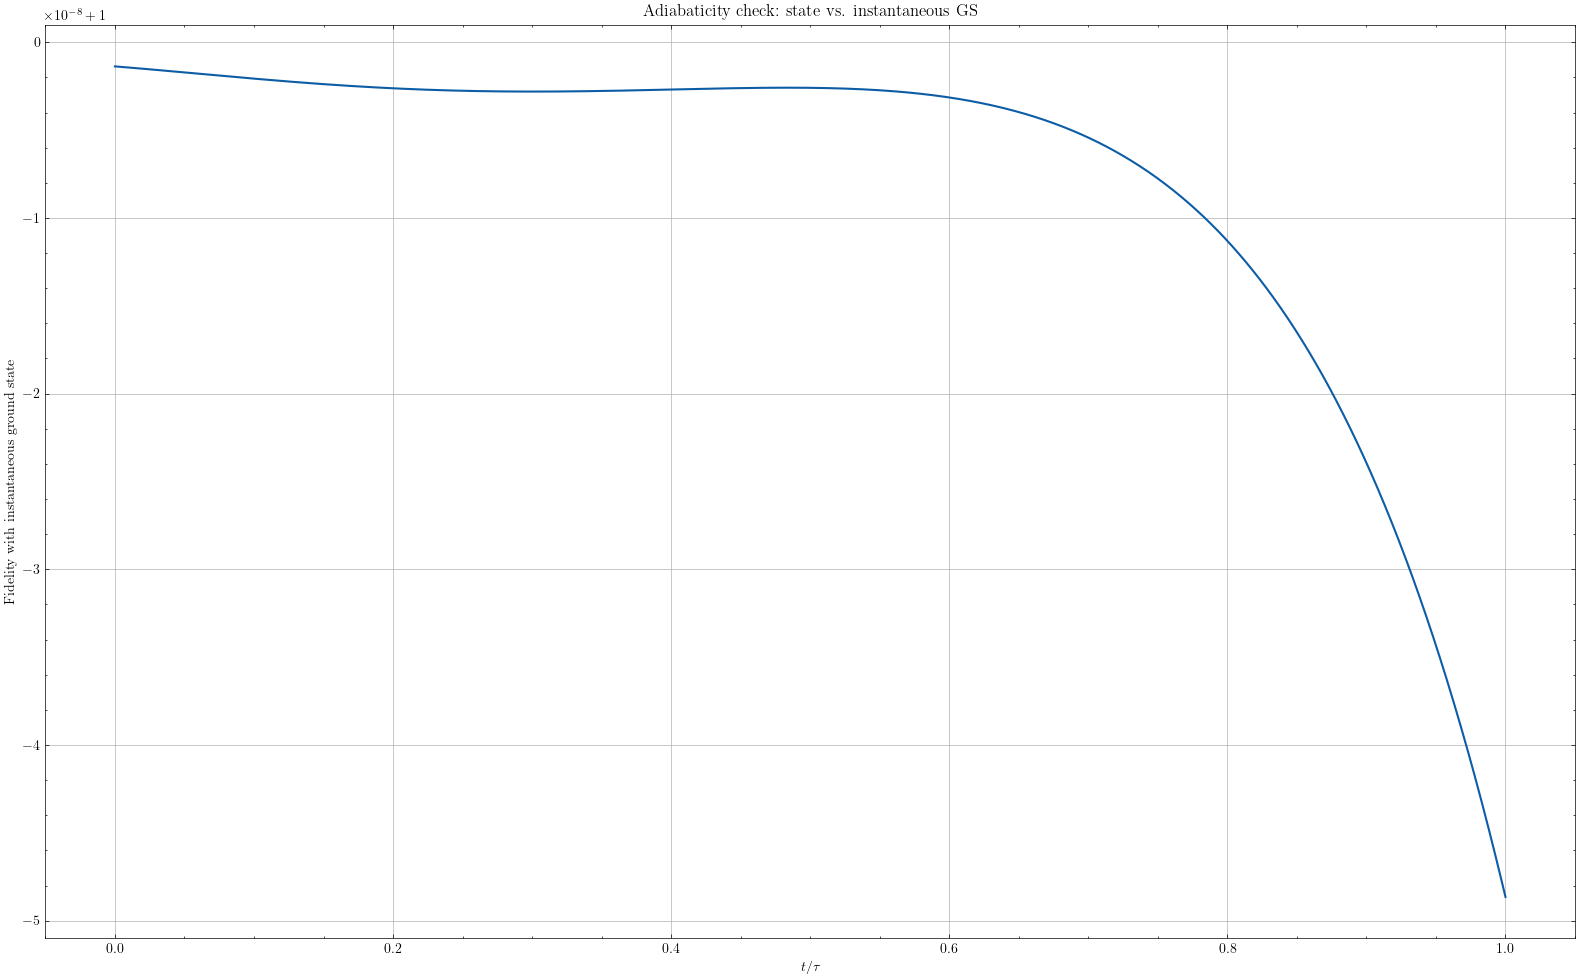

In [15]:
t_final = 10.0
def instantaneous_ground_state(j, theta, t):
    """Return the ground state of H(t) at parameter theta."""
    H_t = construct_hamiltonian(j, theta, t, t_final)
    eigvals, eigvecs = H_t.eigenstates()
    return eigvecs[0]

def fidelity_vs_instantaneous_ground(j, theta, t_target):
    """
    Evolve the initial ground state under H(t) from t=0 to t_target,
    and compute fidelity at each time against the instantaneous ground state.
    """
    # prepare time grid
    times = np.arange(0, t_target + dt, dt)

    # initial ground state at t=0
    psi0 = instantaneous_ground_state(j, 0, 0)

    # set up H(t) callback for mesolve
    def H_time(t, args):
        return construct_hamiltonian(j, theta, t, t_final)

    # evolve
    result = qt.mesolve(H_time, psi0, times, [], args={})
    evolved_states = result.states

    # compute fidelities
    fidelities = []
    for psi_t, t in zip(evolved_states, times):
        psi_gs = instantaneous_ground_state(j, theta, t)
        fid = np.abs(psi_gs.overlap(psi_t))**2
        fidelities.append(fid)

    return times, fidelities

# --- And then in your “Main calculation” section, for a chosen t_final: ---
times, fidelities = fidelity_vs_instantaneous_ground(j=0.5*N, theta=delta*0.5, t_target=t_final)

# Plot it
plt.figure(figsize=(16,10))
plt.plot(times / t_final, fidelities, lw=1.5)
plt.xlabel(r"$t/\tau$")
plt.ylabel("Fidelity with instantaneous ground state")
plt.title("Adiabaticity check: state vs. instantaneous GS")
#plt.ylim(0.98, 1.02)
plt.grid(True)
plt.tight_layout()
plt.show()

#times = np.arange(0, t_final + dt, dt)

#psi0 = instantaneous_ground_state(j, delta, 0)

#def H_time(t, args):
#    return construct_hamiltonian(j, delta, t, t_final)

    # evolve
#result = qt.mesolve(H_time, psi0, times, [], args={})
#evolved_states = result.states

#for t in times:
#    print(instantaneous_ground_state(j, delta, t))

#print(evolved_states)

# Local adiabatic ramp

## Ground-state of $H_C$

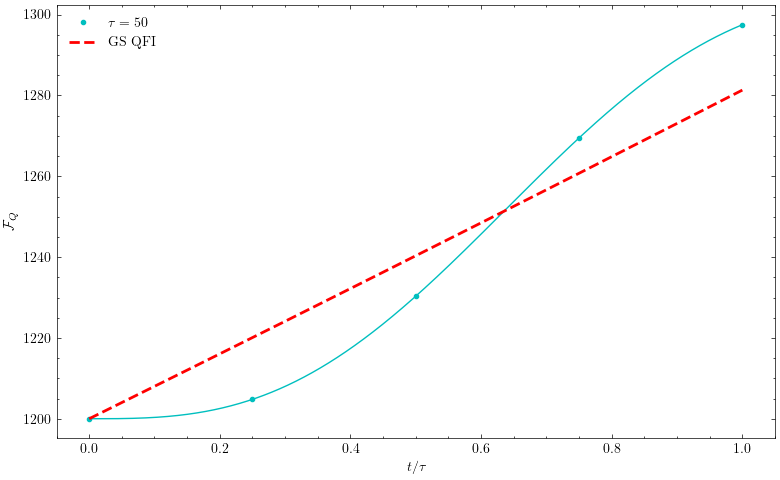

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.1       # time step for integration
g0 = 0.1        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
gamma = 150     # adiabatic parameter
j = 2          # angular momentum quantum number
N = 2*j         # number of spins
c = 0.5*np.sqrt(0.5*N*(0.5*N+1))
##############################################################################
# Define functions with t as a parameter
##############################################################################
def g_func(t):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    #return 1/(1/g0 + t/(N**2*gamma))
    return 1/(1/g0 + t/gamma)
    #return 1/np.sqrt(1+2*t/c)

def construct_hamiltonian(j, theta, t):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target):
    # Initial Hamiltonian at t = 0 and its ground state
    H0 = construct_hamiltonian(j, theta, 0)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]  # ground state

    # Evolve from t = 0 to t_target
    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta, t_target)
    psi_plus  = simulate_final_state(j, theta + delta, t_target)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return qfi

def qfi_ground(N, t):
    return N*(0.5*N+1) / (g_func(t)**2)

def analytical_qfi(t):
    #return N*(0.5*N+1)*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2
    #return N*(0.5*N+1)*np.abs(((N**2*gamma)**(1+1j*gamma*N**2)-(g0*t+gamma*N**2)**(1+1j*gamma*N**2))/(g0*(gamma*N**2-1j))*(g0*t+gamma*N**2)**(1j*gamma*N**2))**2
    term1 = 0.5*np.sqrt(0.5*N*(0.5*N+1)) * (gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j)*(g0*t+gamma)**(1j*gamma))
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / (g0) * (1+g0*t/gamma)**(-1j*gamma)
    return 8.0 * np.abs(term1 + term2)**2
    #return N*(0.5*N+1)*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2

# Define a continuous range of final times (e.g., from 0.1 to 25)
T_values = [50]
colors = ['c']
#colors = ['c', 'b', 'm']

plt.figure(figsize=(8, 5))
tau_values = np.linspace(0, 1, 5)  # Normalized time from 0 to 1
tau_values_ana = np.linspace(0, 1, 20000)  # Higher resolution for analytical plot

import os

# Create a directory to store the data if it doesn't exist
data_dir = 'qfi_data'
os.makedirs(data_dir, exist_ok=True)

for i, T_val in enumerate(T_values):
    qfi_analytical = [analytical_qfi(t * T_val) for t in tau_values_ana]
    filename = os.path.join(data_dir, f'qfi_ana_LA_Hc_T{T_val}.npy')
    np.save(filename, qfi_analytical)
    plt.plot(tau_values_ana, qfi_analytical, color=colors[i])

# Compute and plot dynamic QFI for each T as a function of tau = t/T
for i, T_val in enumerate(T_values):
    qfi_dyn = []
    for tau in tau_values:
        t = tau * T_val  # Convert normalized time to actual time
        qfi_val = compute_qfi_second_order_fidelity(j, theta0, t, delta)
        qfi_dyn.append(qfi_val)
    filename = os.path.join(data_dir, f'qfi_dyn_LA_Hc_T{T_val}.npy')
    np.save(filename, qfi_dyn)
    plt.plot(tau_values, qfi_dyn, color=colors[i], marker='.', linestyle = 'None', label=f'$ \\tau = {T_val}$')

T_ground = 50
qfi_ground_vals = []
for tau in tau_values_ana:
    t = tau * T_ground
    qfi_ground_vals.append(qfi_ground(N, t))
plt.plot(tau_values_ana, qfi_ground_vals, 'r--', linewidth=2, label="GS QFI")

plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
#plt.yscale('log')
#plt.ylim(10,None)
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("qfiHcLAlog.pdf", format="pdf", bbox_inches="tight")
plt.show()


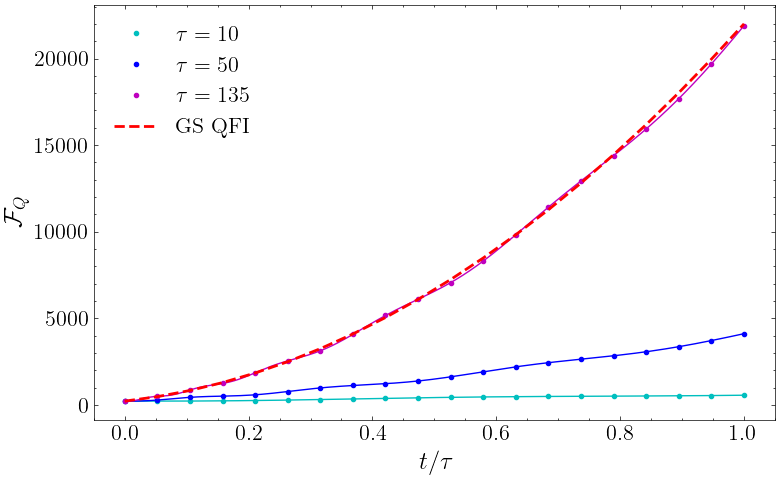

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams.update({
    "axes.labelsize": 18,    # x- and y-label size
    "axes.titlesize": 18,    # title size
    "xtick.labelsize": 16,   # x-tick label size
    "ytick.labelsize": 16,   # y-tick label size
    "legend.fontsize": 16,   # legend text size
})

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
gamma = 15     # adiabatic parameter
j = 10          # angular momentum quantum number
N = 2*j         # number of spins
c=1

##############################################################################
# Define functions with t as a parameter
##############################################################################
def g_func(t):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    return 1/(1/g0 + t/gamma)

def construct_hamiltonian(j, theta, t):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target):
    # Initial Hamiltonian at t = 0 and its ground state
    H0 = construct_hamiltonian(j, theta, 0)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]  # ground state

    # Evolve from t = 0 to t_target
    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta - 0.5*delta, t_target)
    psi_plus  = simulate_final_state(j, theta + 0.5*delta, t_target)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return qfi

def qfi_ground(N, t):
    return N*(0.5*N+1) / (g_func(t)**2)

def analytical_qfi(t):
    #return N*(0.5*N+1)*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2
    term1 = 0.5*np.sqrt(0.5*N*(0.5*N+1)) * (gamma**(1+1j*gamma)-(c*g0*t+gamma)**(1+1j*gamma))/(c*g0*(gamma-1j)*(c*g0*t+gamma)**(1j*gamma))
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / (c*g0) * (1+c*g0*t/gamma)**(-1j*gamma)
    return 8.0 * np.abs(term1 + term2)**2
import os

# Create a directory to store the data if it doesn't exist
data_dir = 'qfi_data'
os.makedirs(data_dir, exist_ok=True)

# Define a continuous range of final times (e.g., from 0.1 to 25)
T_values = [10, 50, 135]
tau_values = np.linspace(0, 1, 20)
tau_values_ana = np.linspace(0, 1, 20000)

plt.figure(figsize=(8, 5))

for i, T_val in enumerate(T_values):
    qfi_analytical = [analytical_qfi(t * T_val) for t in tau_values_ana]
    filename = os.path.join(data_dir, f'qfi_ana_LA_H_T{T_val}.npy')
    np.save(filename, qfi_analytical)
    plt.plot(tau_values_ana, qfi_analytical, color=colors[i])

# Compute and plot dynamic QFI for each T as a function of tau = t/T
for i, T_val in enumerate(T_values):
    qfi_dyn = []
    for tau in tau_values:
        t = tau * T_val  # Convert normalized time to actual time
        qfi_val = compute_qfi_second_order_fidelity(j, theta0, t, delta)
        qfi_dyn.append(qfi_val)
    filename = os.path.join(data_dir, f'qfi_dyn_LA_H_T{T_val}.npy')
    np.save(filename, qfi_dyn)
    plt.plot(tau_values, qfi_dyn, color=colors[i], marker='.', linestyle = 'None', label=f'$ \\tau = {T_val}$')

T_ground = 135
qfi_ground_vals = []
for tau in tau_values:
    t = tau * T_ground
    qfi_ground_vals.append(qfi_ground(N, t))
plt.plot(tau_values, qfi_ground_vals, 'r--', linewidth=2, label="GS QFI")

plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
#plt.yscale('log')
#plt.ylim(10,None)
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("qfiHcLAlog1.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
# --- Insert after your construct_hamiltonian definition ---

def instantaneous_ground_state(j, theta, t):
    """Return the ground state of H(t) at parameter theta."""
    H_t = construct_hamiltonian(j, theta, t)
    eigvals, eigvecs = H_t.eigenstates()
    return eigvecs[0]

def fidelity_vs_instantaneous_ground(j, theta, t_target):
    """
    Evolve the initial ground state under H(t) from t=0 to t_target,
    and compute fidelity at each time against the instantaneous ground state.
    """
    # prepare time grid
    times = np.arange(0, t_target + dt, dt)

    # initial ground state at t=0
    psi0 = instantaneous_ground_state(j, theta, 0)

    # set up H(t) callback for mesolve
    def H_time(t, args):
        return construct_hamiltonian(j, theta, t)

    # evolve
    result = qt.mesolve(H_time, psi0, times, [], args={})
    evolved_states = result.states

    # compute fidelities
    fidelities = []
    for psi_t, t in zip(evolved_states, times):
        psi_gs = instantaneous_ground_state(j, theta, t)
        fid = np.abs(psi_gs.overlap(psi_t))**2
        fidelities.append(fid)

    return times, fidelities

# --- And then in your “Main calculation” section, for a chosen t_final: ---
t_final = 20.0
times, fidelities = fidelity_vs_instantaneous_ground(j=0.5*N, theta=0.5, t_target=t_final)

# Plot it
plt.figure(figsize=(8,4))
plt.plot(times / gamma, fidelities, lw=1.5)
plt.xlabel(r"$t/\tau$")
plt.ylabel("Fidelity with instantaneous ground state")
plt.title("Adiabaticity check: state vs. instantaneous GS")
plt.ylim(0.98, 1.02)
plt.grid(True)
plt.tight_layout()
plt.show()

## Ground-state of $H$

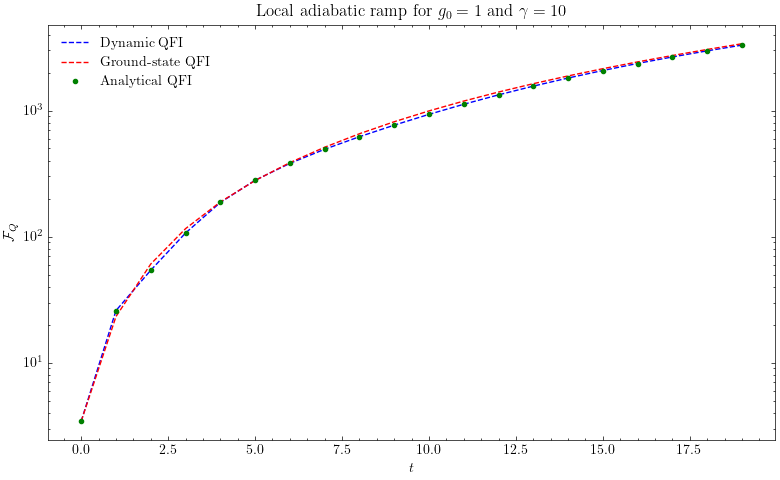

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
gamma = 5     # adiabatic parameter
j = 10          # angular momentum quantum number
N = 2*j         # number of spins
c = 8           #gap constant (CORRECT IT IN THE ANALYTICAL QFI) MUST BE IN ABSOLUTE VALUE

##############################################################################
# Define functions with t as a parameter
##############################################################################
def g_func(t, theta):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    return 1/(1/g0 + c*t/gamma)

def construct_hamiltonian(j, theta, t):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = c*g_func(t, theta) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target):
    # Initial Hamiltonian at t = 0 and its ground state
    H0 = construct_hamiltonian(j, theta, 0)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]  # ground state

    # Evolve from t = 0 to t_target
    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta - 0.5*delta, t_target)
    psi_plus  = simulate_final_state(j, theta + 0.5*delta, t_target)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return qfi

def qfi_ground(N, t, theta):
    return N*(N*0.5+1) / (g_func(t, theta)**2*c**2)
    #23596010685223
##############################################################################
# Main calculation and plotting for a continuous range of final times t
##############################################################################

# Define a continuous range of final times (e.g., from 0.1 to 25)
t_final = np.arange(0, 20, 1)
#N_values = np.arange(2,40,2)

qfi_dyn_values = []
qfi_ground_values = []

for t in t_final:
    # Compute dynamic QFI using simulation
    qfi_dyn = compute_qfi_second_order_fidelity(0.5*N, theta0, t, delta)
    qfi_dyn_values.append(qfi_dyn)
    
    # Compute ground-state (Victor's) QFI
    qfi_ground_val = qfi_ground(N, t, theta0)
    qfi_ground_values.append(qfi_ground_val)

def analytical_qfi(t):
    term1 = 0.5*np.sqrt(0.5*N*(0.5*N+1)) * (gamma**(1+1j*gamma)-(c*g0*t+gamma)**(1+1j*gamma))/(c*g0*(gamma-1j)*(c*g0*t+gamma)**(1j*gamma))
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / (c*g0) * (1+c*g0*t/gamma)**(-1j*gamma)
    return 8.0 * np.abs(term1 + term2)**2
analytical_qfis = [analytical_qfi(t) for t in t_final]
plt.figure(figsize=(8, 5))
plt.plot(t_final, qfi_dyn_values,  'b--', label="Dynamic QFI")
plt.plot(t_final, qfi_ground_values, 'r--', label="Ground-state QFI")
plt.plot(t_final, analytical_qfis, 'g.', label='Analytical QFI')
plt.xlabel(r"$t$")
plt.ylabel(r"$\mathcal{F}_Q$")
plt.title(r"Local adiabatic ramp for $g_0 = 1$ and $\gamma = 10$")
plt.yscale('log')
#plt.ylim([800, 1000])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy.optimize import curve_fit

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 100        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
gamma = 1     # adiabatic parameter
j = 20          # angular momentum quantum number
N = 2*j         # number of spins

def analytical_qfi(t):
    return N**2*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2/2

t_final = np.arange(0,1e7,1)
analytical_qfis = [analytical_qfi(t) for t in t_final]

def model(t, a):
    return N**2 * a * t**2

(a_opt,), _ = curve_fit(model, t_final, analytical_qfis)
print("best-fit coefficient a =", a_opt)
print(1/(2*(gamma**2+1)))

best-fit coefficient a = 0.2500000006601086
0.25


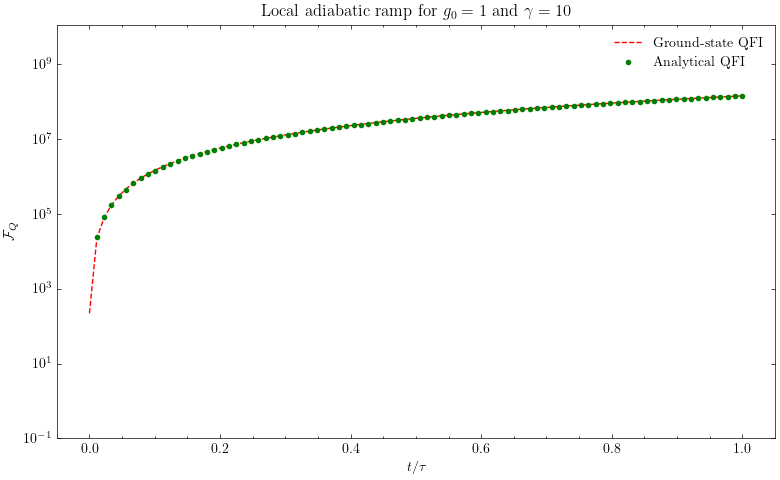

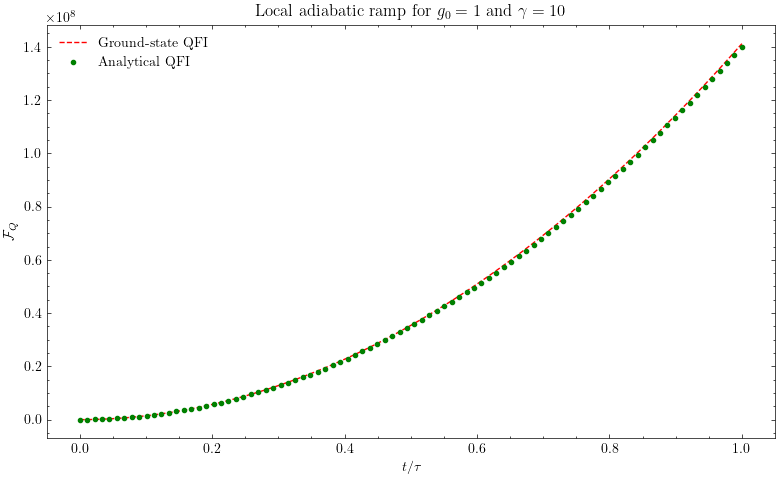

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-7    # finite difference for the QFI calculation
gamma = 10     # adiabatic parameter
j = 10          # angular momentum quantum number
N = 2*j         # number of spins

##############################################################################
# Define functions with t as a parameter
##############################################################################
def g_func(t, theta):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    return 1/(1/g0 + t/gamma)

def construct_hamiltonian(j, theta, t):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t, theta) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target):
    # Initial Hamiltonian at t = 0 and its ground state
    H0 = construct_hamiltonian(j, 0, 0)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]  # ground state

    # Evolve from t = 0 to t_target
    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta - 0.5*delta, t_target)
    psi_plus  = simulate_final_state(j, theta + 0.5*delta, t_target)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return qfi

def qfi_ground(N, t, theta):
    return N*(0.5*N+1) / (g_func(t, theta)**2)

##############################################################################
# Main calculation and plotting for a continuous range of final times t
##############################################################################

# Define a continuous range of final times (e.g., from 0.1 to 25)
t_final = np.linspace(0, 8000, 90)
tau_values = np.linspace(0, 1, 90)
#N_values = np.arange(2,40,2)

qfi_dyn_values = []
qfi_ground_values = []

for t in t_final:
#    # Compute dynamic QFI using simulation
#    qfi_dyn = compute_qfi_second_order_fidelity(0.5*N, theta0, t, delta)
#    qfi_dyn_values.append(qfi_dyn)
    
    # Compute ground-state (Victor's) QFI
    qfi_ground_val = qfi_ground(N, t, theta0)
    qfi_ground_values.append(qfi_ground_val)

def analytical_qfi(t):
    return N*(0.5*N+1)*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2

analytical_qfis = [analytical_qfi(t) for t in t_final]
plt.figure(figsize=(8, 5))
#plt.plot(tau_values, qfi_dyn_values,  'b--', label="Dynamic QFI")
plt.plot(tau_values, qfi_ground_values, 'r--', label="Ground-state QFI")
plt.plot(tau_values, analytical_qfis, 'g.', label='Analytical QFI')
plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
plt.title(r"Local adiabatic ramp for $g_0 = 1$ and $\gamma = 10$")
plt.yscale('log')
plt.ylim([0.1, None])
#plt.savefig("finalplotadiabaticGSHclog.pdf", format="pdf", bbox_inches="tight")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
#plt.plot(tau_values, qfi_dyn_values,  'b--', label="Dynamic QFI")
plt.plot(tau_values, qfi_ground_values, 'r--', label="Ground-state QFI")
plt.plot(tau_values, analytical_qfis, 'g.', label='Analytical QFI')
plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
plt.title(r"Local adiabatic ramp for $g_0 = 1$ and $\gamma = 10$")
#plt.savefig("finalplotadiabaticGSHc.pdf", format="pdf", bbox_inches="tight")
plt.legend()
plt.tight_layout()
plt.show()

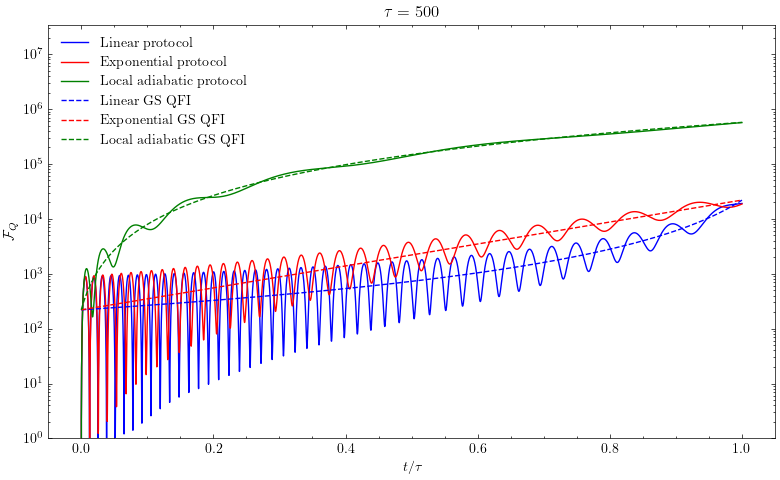

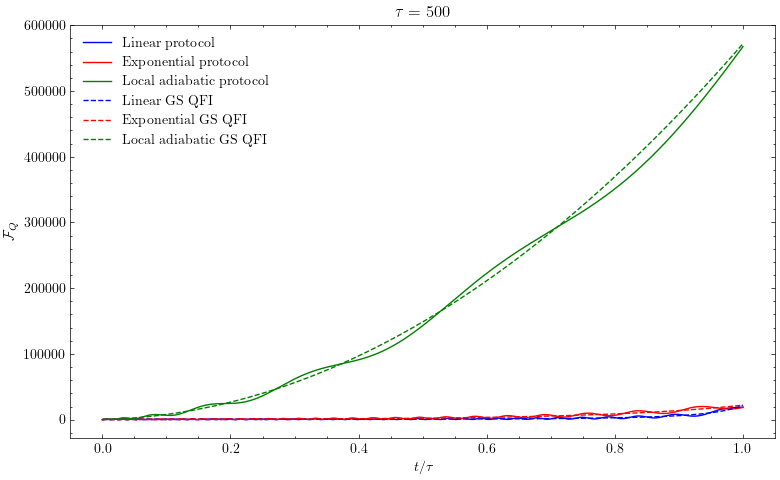

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy import special

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1.0        # initial value of g(t)
g1 = 0.1        # final value of g(t)
theta0 = 0      # central value of the parameter theta
delta = 1e-7    # finite difference for the QFI calculation
a = -1/(np.log(g1/g0))
gamma = 10     # adiabatic parameter
tau_final = 500
g = (g1-g0)/tau_final
N=20

##############################################################################
# Define functions with T as a parameter
##############################################################################
def g_func_linear(t, T):
    return g0 + (g1 - g0) * (t / T)

def qfi_linear(t):
    return 0.5*N*(0.5*N+1)*np.pi/np.abs(g)*np.abs(special.erf(np.sqrt(1j/(2*g))*1j*(g*t+g0))-special.erf(np.sqrt(1j/(2*g))*1j*g0))**2

def g_func_exp(t, T):
    return g0 * np.exp(-t / (a*T))

def qfi_exp(t, tau):
    Ei_full = special.expi(-1j * a * g0 * tau)
    Ei_cut  = special.expi(-1j * a * np.exp(-t/(a*tau)) * g0 * tau)
    core = -1j * a * np.exp(1j * a * np.exp(-t/(a*tau)) * g0 * tau) * tau * (Ei_full - Ei_cut)
    return N*(0.5*N+1) * np.abs(core)**2

def g_func_LA(t):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    return 1/(1/g0 + t/gamma)

def qfi_LA(t):
    return N*(0.5*N+1)*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2

t_final = np.arange(0, tau_final, .1)
tau_values = np.linspace(0, 1, 10*tau_final)
linear_qfis = [qfi_linear(t) for t in t_final]
exp_qfis = [qfi_exp(t, tau_final) for t in t_final]
LA_qfis = [qfi_LA(t) for t in t_final]
linear_qfis_GS = [N*(0.5*N+1)/g_func_linear(t,tau_final)**2 for t in t_final]
exp_qfis_GS = [N*(0.5*N+1)/g_func_exp(t,tau_final)**2 for t in t_final]
LA_qfis_GS = [N*(0.5*N+1)/g_func_LA(t)**2 for t in t_final]
plt.figure(figsize=(8, 5))
plt.plot(tau_values, linear_qfis,  color='blue', label="Linear protocol")
plt.plot(tau_values, exp_qfis, color='red', label="Exponential protocol")
plt.plot(tau_values, LA_qfis, color='green', label='Local adiabatic protocol')
plt.plot(tau_values, linear_qfis_GS,  'b--', label="Linear GS QFI")
plt.plot(tau_values, exp_qfis_GS, 'r--', label="Exponential GS QFI")
plt.plot(tau_values, LA_qfis_GS, 'g--', label='Local adiabatic GS QFI')
plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
plt.title(rf"$\tau = {tau_final}$")
plt.yscale('log')
plt.ylim([1, None])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("jointplotlog90Hc.pdf", format="pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(tau_values, linear_qfis,  color='blue', label="Linear protocol")
plt.plot(tau_values, exp_qfis, color='red', label="Exponential protocol")
plt.plot(tau_values, LA_qfis, color='green', label='Local adiabatic protocol')
plt.plot(tau_values, linear_qfis_GS,  'b--', label="Linear GS QFI")
plt.plot(tau_values, exp_qfis_GS, 'r--', label="Exponential GS QFI")
plt.plot(tau_values, LA_qfis_GS, 'g--', label='Local adiabatic GS QFI')
plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
plt.title(rf"$\tau = {tau_final}$")
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("jointplot90Hc.pdf", format="pdf", bbox_inches="tight")
plt.show()

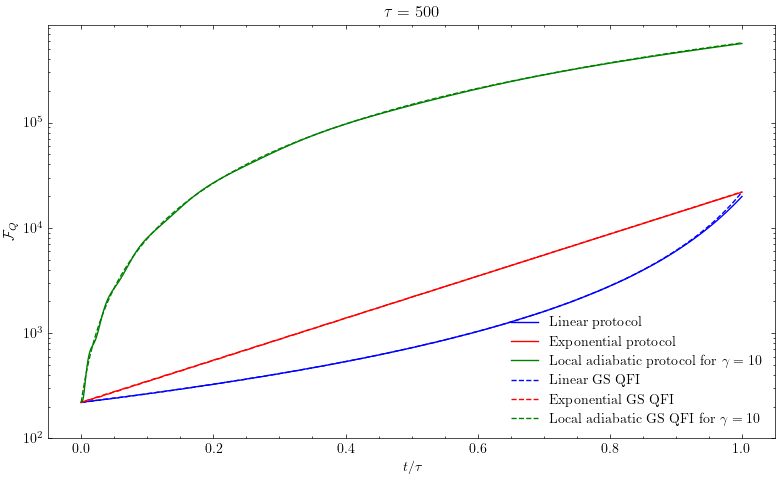

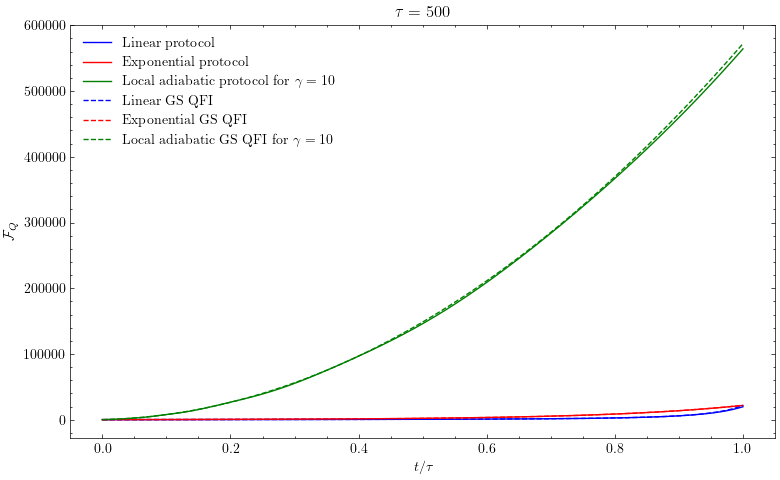

22158.8837224076


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy import special

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1.0        # initial value of g(t)
g1 = 0.1        # final value of g(t)
theta0 = 0      # central value of the parameter theta
delta = 1e-7    # finite difference for the QFI calculation
a = -1/(np.log(g1/g0))
gamma = 10     # adiabatic parameter
tau_final = 500
g = (g1-g0)/tau_final
N=20

##############################################################################
# Define functions with T as a parameter
##############################################################################
def g_func_linear(t, T):
    return g0 + (g1 - g0) * (t / T)

def qfi_linear(t):
    return 8*np.abs(0.5*np.sqrt(0.5*N*(0.5*N+1))*np.sqrt(np.pi/(2*1j*g))*np.exp(-1j*g0**2/(2*g))*np.exp(-0.5*1j*g*t**2)*(special.erf(np.sqrt(1j/(2*g))*1j*(g*t+g0))-special.erf(np.sqrt(1j/(2*g))*1j*g0))-0.5*np.sqrt(0.5*N*(0.5*N+1))/g0*np.exp(-0.5*1j*g*t**2))**2

def g_func_exp(t, T):
    return g0 * np.exp(-t / (a*T))

def qfi_exp(t, tau):
    # Compute inner terms
    exp_factor = np.exp(-t / (a * tau))
    E1 = special.expi(-1j * a * g0 * tau)
    E2 = special.expi(-1j * a * exp_factor * g0 * tau)
    
    term1 = - (1j * 0.5*np.sqrt(0.5*N*(0.5*N+1))) * a * np.exp(1j * a * exp_factor * g0 * tau) * tau * (E1 - E2)
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / g0 * np.exp(-1j * a * (1 - exp_factor) * g0 * tau)
    
    return 8.0 * np.abs(term1 + term2)**2

def g_func_LA(t):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    return 1/(1/g0 + t/gamma)

def qfi_LA(t):
    term1 = 0.5*np.sqrt(0.5*N*(0.5*N+1)) * (gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j)*(g0*t+gamma)**(1j*gamma))
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / g0 * (1+g0*t/gamma)**(-1j*gamma)
    return 8.0 * np.abs(term1 + term2)**2

t_final = np.arange(0, tau_final, .1)
tau_values = np.linspace(0, 1, 10*tau_final)
linear_qfis = [qfi_linear(t) for t in t_final]
exp_qfis = [qfi_exp(t, tau_final) for t in t_final]
LA_qfis = [qfi_LA(t) for t in t_final]
linear_qfis_GS = [N*(0.5*N+1)/g_func_linear(t,tau_final)**2 for t in t_final]
exp_qfis_GS = [N*(0.5*N+1)/g_func_exp(t,tau_final)**2 for t in t_final]
LA_qfis_GS = [N*(0.5*N+1)/g_func_LA(t)**2 for t in t_final]
plt.figure(figsize=(8, 5))
plt.plot(tau_values, linear_qfis,  color='blue', label="Linear protocol")
plt.plot(tau_values, exp_qfis, color='red', label="Exponential protocol")
plt.plot(tau_values, LA_qfis, color='green', label=r'Local adiabatic protocol for $\gamma = 10$')
plt.plot(tau_values, linear_qfis_GS,  'b--', label="Linear GS QFI")
plt.plot(tau_values, exp_qfis_GS, 'r--', label="Exponential GS QFI")
plt.plot(tau_values, LA_qfis_GS, 'g--', label=r'Local adiabatic GS QFI for $\gamma = 10$')
plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
plt.title(rf"$\tau = {tau_final}$")
plt.yscale('log')
plt.ylim([100, None])
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("jointplotlogGS500.pdf", format="pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(tau_values, linear_qfis,  color='blue', label="Linear protocol")
plt.plot(tau_values, exp_qfis, color='red', label="Exponential protocol")
plt.plot(tau_values, LA_qfis, color='green', label=r'Local adiabatic protocol for $\gamma = 10$')
plt.plot(tau_values, linear_qfis_GS,  'b--', label="Linear GS QFI")
plt.plot(tau_values, exp_qfis_GS, 'r--', label="Exponential GS QFI")
plt.plot(tau_values, LA_qfis_GS, 'g--', label=r'Local adiabatic GS QFI for $\gamma = 10$')
plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\mathcal{F}_Q$")
plt.title(rf"$\tau = {tau_final}$")
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("jointplotGS500.pdf", format="pdf", bbox_inches="tight")
plt.show()

print(qfi_LA(90))

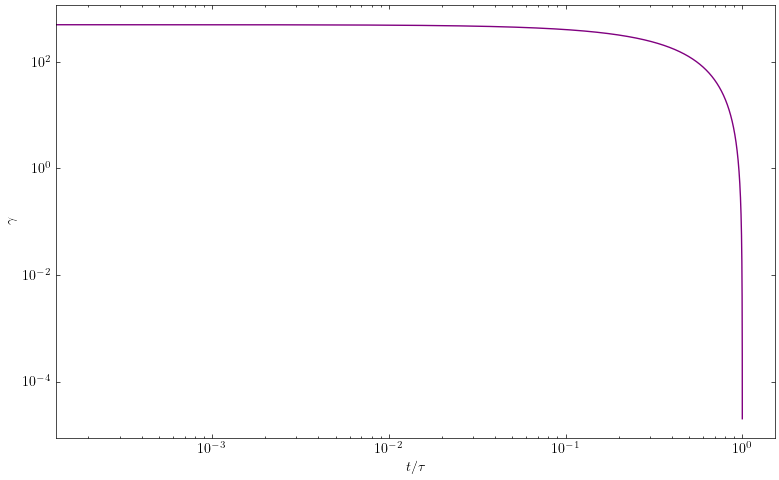

0.0


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy import special

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1.0        # initial value of g(t)
g1 = 0        # final value of g(t)
theta0 = 0      # central value of the parameter theta
delta = 1e-7    # finite difference for the QFI calculation
gamma = 10     # adiabatic parameter
tau_final = 500
g = (g1-g0)/tau_final
N=20

def g_func_linear(t, T):
    return g0 + (g1 - g0) * (t / T)

def ad_coef_linear(t):
    return np.abs(1/g)*g_func_linear(t,tau_final)**2

t_final = np.arange(0, tau_final, .1)
tau_values = np.linspace(0, 1, 10*tau_final)
coef_values = [ad_coef_linear(t) for t in t_final]
plt.figure(figsize=(8, 5))
plt.loglog(tau_values, coef_values, color='purple')
plt.xlabel(r"$t / \tau$")
plt.ylabel(r"$\gamma$")
plt.tight_layout()
#plt.savefig("jointplotlogGS500.pdf", format="pdf", bbox_inches="tight")
plt.show()

print(ad_coef_linear(tau_final))

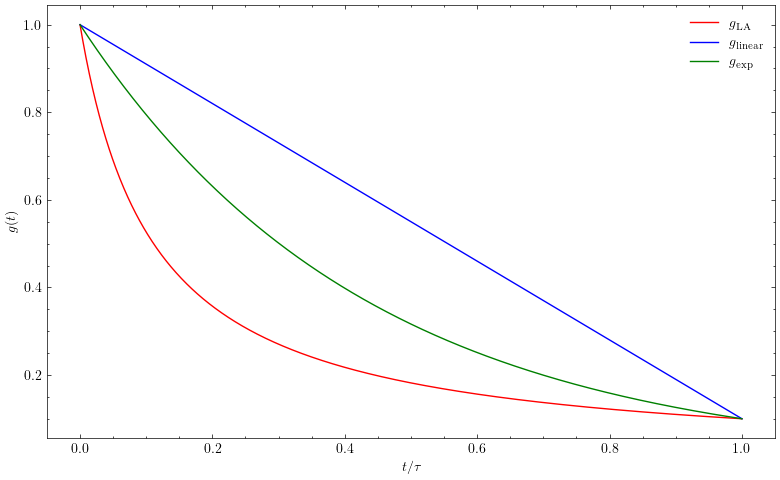

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1        # initial value of g(t)
g1 = 0.1        # final value of g(t)
j = 10          # angular momentum quantum number
N = 2*j         # number of spins
T = 90
a = -1/(np.log(g1/g0))
gamma = 10

##############################################################################
# Define functions with T as a parameter
##############################################################################
def g_func_LA(t, gamma):
    return 1/(1/g0 + t/gamma)

def g_func_linear(t, T):
    return g0 + (g1-g0)*t/T

def g_func_exp(t, T):
    return g0 * np.exp(-t / (a*T))

t_values = np.linspace(0,T,1000)
tau_values = []
for t in t_values:
    tau_values.append(t/T)
g_values_LA = [g_func_LA(t, gamma) for t in t_values]
g_values_linear = [g_func_linear(t, T) for t in t_values]
g_values_exp = [g_func_exp(t, T) for t in t_values]
plt.figure(figsize=(8, 5))
plt.plot(tau_values, g_values_LA, color='red', label=r'$g_{\text{LA}}$')
plt.plot(tau_values, g_values_linear, color='blue', label=r'$g_{\text{linear}}$')
plt.plot(tau_values, g_values_exp, color='green', label=r'$g_{\text{exp}}$')
plt.xlabel(r"$t/\tau$")
plt.ylabel(r"$g (t)$")
plt.legend()
plt.tight_layout()
plt.savefig("comparisonrampsfinal.pdf", format="pdf", bbox_inches="tight")
plt.show()

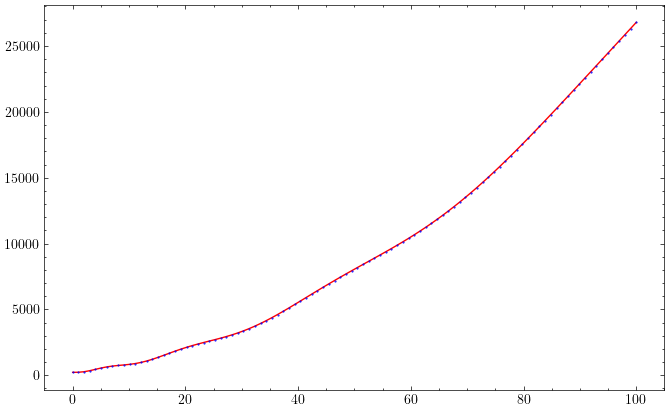

In [151]:
N = 20
gamma = 10

def qfi_LA(t):
    term1 = 0.5*np.sqrt(0.5*N*(0.5*N+1)) * (gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j)*(g0*t+gamma)**(1j*gamma))
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / g0 * (1+g0*t/gamma)**(-1j*gamma)
    return 8.0 * np.abs(term1 + term2)**2

def new_qfi(t):
    return N*(0.5*N+1)/(g0**2*(gamma**2+1))*np.abs(1j*gamma**(1j*gamma)-(g0*t+gamma)**(1+1j*gamma))**2

plt.figure(figsize=(8,5))
t_values = np.linspace(0,100,100)
plt.plot(t_values, qfi_LA(t_values), color='red')
plt.plot(t_values, new_qfi(t_values), 'b.', markersize=1)
plt.show()

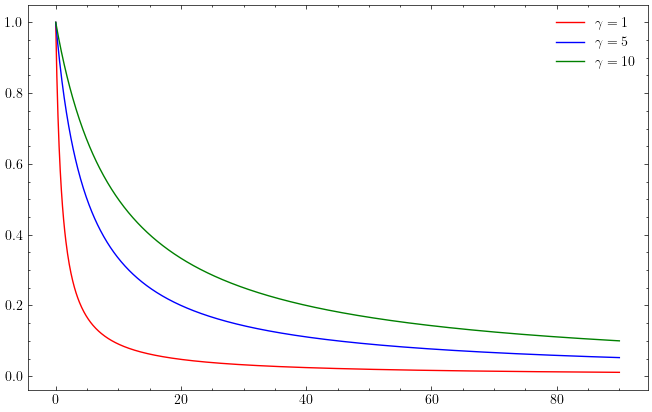

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1        # initial value of g(t)
g1 = 0.1        # final value of g(t)
j = 10          # angular momentum quantum number
N = 2*j         # number of spins
T = 90

def g_func(t, gamma):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    return 1/(1/g0 + t/gamma)

t_values = np.linspace(0,T,1000)
plt.figure(figsize=(8,5))
plt.plot(t_values, g_func(t_values,1),color='red',label=r'$\gamma=1$')
plt.plot(t_values, g_func(t_values,5),color='blue',label=r'$\gamma=5$')
plt.plot(t_values, g_func(t_values,10),color='green',label=r'$\gamma=10$')
plt.legend()
plt.show()

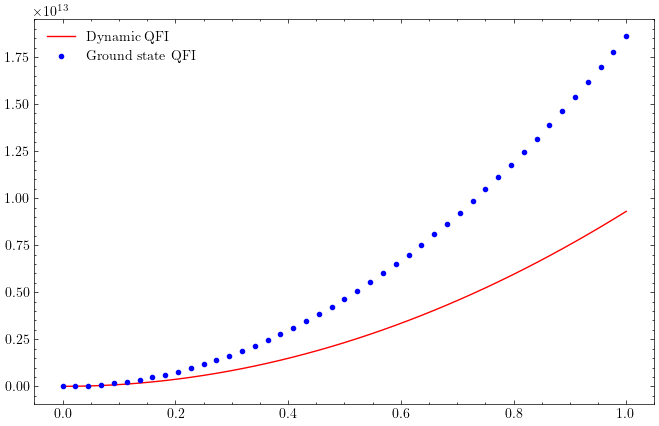

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 100        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
gamma = 1     # adiabatic parameter
j = 30          # angular momentum quantum number
N = 2*j         # number of spins

##############################################################################
# Define functions with t as a parameter
##############################################################################
def g_func(t):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    return 1/(1/g0 + t/gamma)

def qfi_ground(N, t):
    return N*(0.5*N+1) / (g_func(t)**2)

# Define a continuous range of final times (e.g., from 0.1 to 25)
t_final = np.linspace(0, 100000, 45)
tau_values = np.linspace(0, 1, 45)

def analytical_qfi(t):
    term1 = 0.5*np.sqrt(0.5*N*(0.5*N+1)) * (gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j)*(g0*t+gamma)**(1j*gamma))
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / g0 * (1+g0*t/gamma)**(-1j*gamma)
    return 8.0 * np.abs(term1+term2)**2

analytical_qfis = [analytical_qfi(t) for t in t_final]
GS_qfis = [qfi_ground(N, t) for t in t_final]
bound = [t**2*N**2 for t in t_final]

plt.figure(figsize=(8,5))
plt.plot(tau_values, analytical_qfis, color='red', label='Dynamic QFI')
plt.plot(tau_values, GS_qfis, 'b.', label='Ground state QFI')
#plt.loglog(tau_values*0.5, bound, color='green', label='Heisenberg bound')
plt.legend(loc='best')
#plt.yscale('log')
#plt.ylim(100,None)
plt.show()

39
[-0.00020248-0.j] [0.70710675+0.j]
[-0.00033761-0.j] [0.70710669+0.j]
[-0.00047273-0.j] [0.70710661+0.j]
[-0.00060786-0.j] [0.7071065+0.j]
[-0.00074298-0.j] [0.70710637+0.j]
[-0.00087811-0.j] [0.70710621+0.j]
[-0.00101323-0.j] [0.70710601+0.j]
[-0.00114835-0.j] [0.7071058+0.j]
[-0.00128348-0.j] [0.70710555+0.j]
[-0.0014186-0.j] [0.70710528+0.j]
[-0.00155372-0.j] [0.70710498+0.j]
[-0.00168884-0.j] [0.70710465+0.j]
[-0.00182397-0.j] [0.7071043+0.j]
[-0.00195909-0.j] [0.70710392+0.j]
[-0.00209421-0.j] [0.70710351+0.j]
[-0.00222933-0.j] [0.70710307+0.j]
[-0.00236445-0.j] [0.70710261+0.j]
[-0.00249956-0.j] [0.70710212+0.j]
[-0.00263468-0.j] [0.7071016+0.j]
[-0.0027698-0.j] [0.70710106+0.j]
[-0.00290491-0.j] [0.70710048+0.j]
[-0.00304003-0.j] [0.70709988+0.j]
[-0.00317514-0.j] [0.70709926+0.j]
[-0.00331026-0.j] [0.7070986+0.j]
[-0.00344537-0.j] [0.70709792+0.j]
[-0.00358048-0.j] [0.70709721+0.j]
[-0.00371559-0.j] [0.70709648+0.j]
[-0.0038507-0.j] [0.70709571+0.j]
[-0.00398581-0.j] [0.7070

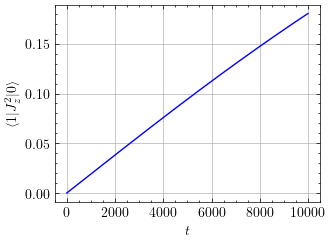

[(-0.0002863563804919614+0j), (-0.00047745160849213303+0j), (-0.0006685466548412256+0j), (-0.0008596414468357911+0j), (-0.0010507359117726493+0j), (-0.0012418299769486082+0j), (-0.0014329235696644294+0j), (-0.0016240166172160242+0j), (-0.001815109046908034+0j), (-0.002006200786039546+0j), (-0.002197291761916859+0j), (-0.002388381901840123+0j), (-0.002579471133117595+0j), (-0.0027705593830608596+0j), (-0.002961646578977564+0j), (-0.0031527326481829315+0j), (-0.0033438175179868026+0j), (-0.0035349011157190776+0j), (-0.0037259833686805253+0j), (-0.003917064204210629+0j), (-0.0041081435496321496+0j), (-0.004299221332267494+0j), (-0.0044902974794518635+0j), (-0.0046813719185327535+0j), (-0.004872444576830007+0j), (-0.005063515381688701+0j), (-0.005254584260480335+0j), (-0.005445651140528716+0j), (-0.005636715949198182+0j), (-0.005827778613837178+0j), (-0.0060188390618342935+0j), (-0.006209897220543091+0j), (-0.006400953017345762+0j), (-0.0065920063795695035+0j), (-0.006783057234691089+0j), 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
gamma = 15     # adiabatic parameter
j = 40         # angular momentum quantum number
N = 2*j         # number of spins
C = 0.5*np.sqrt(0.5*N*(0.5*N+1))  # constant for the analytical QFI
##############################################################################
# Define functions with t as a parameter
##############################################################################
def g_func(t):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    return 1/(1/g0 + t/gamma)

def construct_hamiltonian(j, theta, t):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t) * (Jz**2) - J2 + theta * Jx
    return H

t_values = np.linspace(0, 10000, 1000)
mat_elem = []
i = int(0.5*N-1)
print(i)
for t in t_values:
    Jz = qt.jmat(j, 'z')
    O = Jz**2
    H = construct_hamiltonian(j, delta, t)
    H_c = construct_hamiltonian(j, 0, t)
    eigvals, eigvecs = H.eigenstates()
    eigvals_c, eigvecs_c = H_c.eigenstates()
    psi0_c = eigvecs_c[0]  # ground state
    psi0 = eigvecs[0]  # first excited state
    psi1 = eigvecs[2]
    #print(delta*C/gap)
    print(psi0[i],psi1[i])
    mat_elem.append(psi1.overlap(Jz**2 * psi0))
    #mat_elem.append(np.abs(psi0[i]*psi1[i]))
#print(mat_elem)
plt.plot(t_values, np.abs(mat_elem), color='blue')
plt.xlabel(r"$t$")
plt.ylabel(r"$\langle 1 | J_z^2 | 0 \rangle$")
#plt.title(r"Expectation value of $J_z^2$ in the ground state")
#plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

print(mat_elem)

H = construct_hamiltonian(j, delta, 10000)
eigvals, eigvecs = H.eigenstates()
psi0 = eigvecs[0]  # ground state
psi1 = eigvecs[1]  # first excited state
gap = eigvals[1] - eigvals[0]
#print(gap-g_func(t))
#print(psi0, delta*C/g_func(10))
print(delta*C/g_func(10))
#print(psi1)
#print(psi1[9],psi0[9])
#Jz = qt.jmat(j, 'z')
#O = Jz**2
#print(O.matrix_element(psi0, psi1))

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt

# --------------------------------------------------  parameters
theta   = 1.0e-5                # small perturbation
g0      = 1.0
gamma   = 15.0
j       = 10                    # total spin
N       = 2*j
C_N     = 0.5*np.sqrt(j*(j+1))  # ½√{j(j+1)}
t_vals  = np.linspace(0, 1000, 100)

# --------------------------------------------------  SU(2) generators
Jx  = qt.jmat(j, 'x')
Jz  = qt.jmat(j, 'z')
Jz2 = Jz**2
J2_val = j*(j+1)                # J² is a scalar on this irrep

def g_func(t):
    return 1.0 / (1.0/g0 + t/gamma)

def H_of_t(t):
    return g_func(t)*Jz2 - J2_val*qt.qeye(int(2*j+1)) + theta*Jx

# --------------------------------------------------  pick symmetric state
def symmetric_excited_state(evals, evecs, psi0, Jz2, tol=1e-7):
    """
    Inside the first-excited doublet choose the linear combination that
    maximises |<ψ|Jz²|ψ0>|.  Works even if the numerical degeneracy is imperfect.
    """
    # indices whose E is 'close enough' to the first excited energy
    idx = [k for k,E in enumerate(evals) if abs(E-evals[1]) < tol]

    # fall-back: if we found only one, also take the next eigenvector
    if len(idx) == 1:
        idx.append(idx[0]+1)

    U = qt.Qobj(np.column_stack([evecs[k].full() for k in idx]))  # dim × d
    v = (U.dag() * Jz2 * psi0).full().flatten()                  # length-d vector
    v /= np.linalg.norm(v)                                       # maximise overlap
    return qt.Qobj(U.full() @ v).unit()

# --------------------------------------------------  main loop
num_vals, ana_vals = [], []

for t in t_vals:
    H      = H_of_t(t)
    evals, evecs = H.eigenstates()

    psi0   = evecs[0]
    psi1   = symmetric_excited_state(evals, evecs, psi0, Jz2)
    gap    = evals[1] - evals[0]           # Δ(t)

    num_vals.append(abs(psi1.dag()*Jz2*psi0))
    ana_vals.append(abs(theta*C_N/gap))

num_vals = np.asarray(num_vals)
ana_vals = np.asarray(ana_vals)

# --------------------------------------------------  plot
plt.figure(figsize=(6.4,4))
plt.plot(t_vals, num_vals, 'o-', label=r'Numerical $|\langle1|J_z^2|0\rangle|$')
plt.plot(t_vals, ana_vals, '--', label=r'Analytic $\theta\,C_N/\Delta(t)$')
plt.yscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'Matrix element')
plt.title(r'$\langle1|J_z^{2}|0\rangle$ (symmetric doublet member)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()


TypeError: 'complex' object is not subscriptable

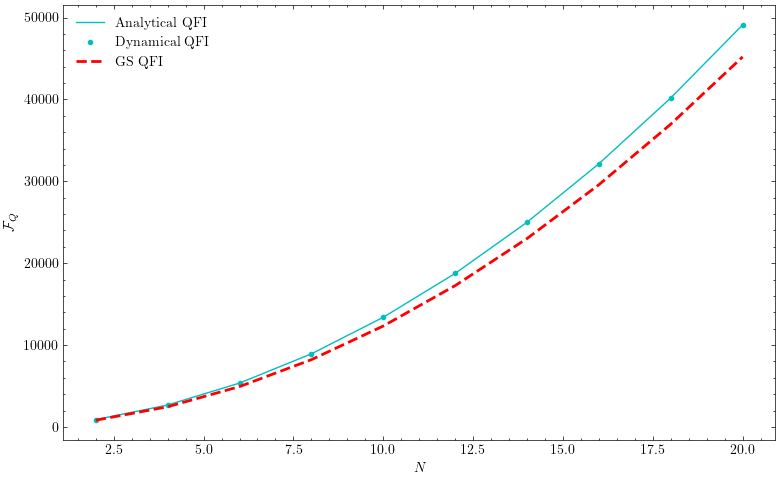

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.1       # time step for integration
g0 = 1        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
gamma = 15     # adiabatic parameter
j = 2          # angular momentum quantum number
N = 2*j         # number of spins
c = 0.5*np.sqrt(0.5*N*(0.5*N+1))
##############################################################################
# Define functions with t as a parameter
##############################################################################
def g_func(t):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    #return 1/(1/g0 + t/(N**2*gamma))
    return 1/(1/g0 + t/gamma)
    #return 1/np.sqrt(1+2*t/c)

def construct_hamiltonian(j, theta, t):
    Jx = qt.jmat(j, 'x')
    Jy = qt.jmat(j, 'y')
    Jz = qt.jmat(j, 'z')
    J2 = Jx**2 + Jy**2 + Jz**2
    H = g_func(t) * (Jz**2) - J2 + theta * Jx
    return H

def simulate_final_state(j, theta, t_target):
    # Initial Hamiltonian at t = 0 and its ground state
    H0 = construct_hamiltonian(j, 0, 0)
    eigvals, eigvecs = H0.eigenstates()
    psi0 = eigvecs[0]  # ground state

    # Evolve from t = 0 to t_target
    times = np.arange(0, t_target + dt, dt)
    def H_t(t, args):
        return construct_hamiltonian(j, theta, t)
    
    result = qt.mesolve(H_t, psi0, times, e_ops=[], args={})
    return result.states[-1]

def compute_qfi_second_order_fidelity(j, theta, t_target, delta):
    """
    Computes the QFI for a pure state via the second-order fidelity expansion:
    
    F(theta, theta+delta) ~ 1 - (QFI/4)*delta^2.
    """
    psi_minus = simulate_final_state(j, theta, t_target)
    psi_plus  = simulate_final_state(j, theta + delta, t_target)
    fidelity = np.abs(psi_minus.overlap(psi_plus))**2
    qfi = 4.0 * (1.0 - fidelity) / (delta**2)
    return qfi

def qfi_ground(N, t):
    return N*(0.5*N+1) / (g_func(t)**2)

def analytical_qfi(N, t):
    return N*(0.5*N+1)*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2
    #return N*(0.5*N+1)*np.abs(((N**2*gamma)**(1+1j*gamma*N**2)-(g0*t+gamma*N**2)**(1+1j*gamma*N**2))/(g0*(gamma*N**2-1j))*(g0*t+gamma*N**2)**(1j*gamma*N**2))**2
    term1 = 0.5*np.sqrt(0.5*N*(0.5*N+1)) * (gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j)*(g0*t+gamma)**(1j*gamma))
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / (g0) * (1+g0*t/gamma)**(-1j*gamma)
    #return 8.0 * np.abs(term1 + term2)**2
    #return N*(0.5*N+1)*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2

# Define a continuous range of final times (e.g., from 0.1 to 25)
T_value = 200
N_values = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
#colors = ['c']
colors = ['c', 'b', 'm']

plt.figure(figsize=(8, 5))

qfi_analytical = [analytical_qfi(N, T_value) for N in N_values]
plt.plot(N_values, qfi_analytical, color=colors[0], label='Analytical QFI')

qfi_dyn = []
for N in N_values:
    qfi_val = compute_qfi_second_order_fidelity(0.5*N, theta0, T_value, delta)
    qfi_dyn.append(qfi_val)

plt.plot(N_values, qfi_dyn, color=colors[0], marker='.', linestyle = 'None', label='Dynamical QFI')

qfi_ground_vals = []
for N in N_values:
    qfi_ground_vals.append(qfi_ground(N, T_value))
plt.plot(N_values, qfi_ground_vals, 'r--', linewidth=2, label="GS QFI")

plt.xlabel(r"$N$")
plt.ylabel(r"$\mathcal{F}_Q$")
#plt.yscale('log')
#plt.ylim(10,None)
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("qfiHcLAlog.pdf", format="pdf", bbox_inches="tight")
plt.show()


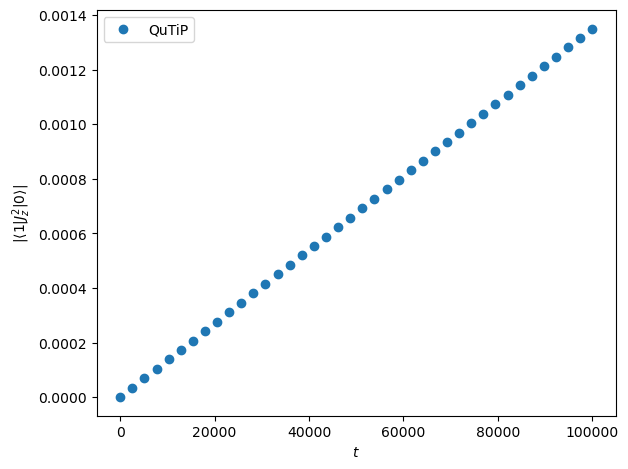

8.101092689187857e-09


In [11]:
import numpy as np, matplotlib.pyplot as plt, qutip as qt

# ---------- parameters -----------------------------------------------------
j      = 40                    # J = N/2
N      = int(2*j)
theta  = 1e-8                  # small transverse field
gamma  = 15.0                  # ramp parameter
s0     = 1.0                   # initial s

# ---------- collective operators ------------------------------------------
Jx = qt.jmat(j, 'x')
Jy = qt.jmat(j, 'y')
Jz = qt.jmat(j, 'z');  Jz2 = Jz**2
J2 = Jx**2 + Jy**2 + Jz2

# ---------- helper functions ----------------------------------------------
def s_of_t(t):
    return 1.0 / (1.0/s0 + t/gamma)        # hyperbola

def H_of_t(t):
    return theta*Jx + s_of_t(t)*Jz2 - J2

def even_first_excited(evecs):
    """
    QuTiP returns an arbitrary orthonormal basis for the |m=±1> subspace.
    Build the symmetric combination |1_+> = (|+1> + |-1>)/√2.
    """
    psi1, psi2 = evecs[1], evecs[2]        # degenerate pair
    psi_plus   = (psi1 + psi2).unit()      # even parity
    return psi_plus

# ---------- compute matrix element along the ramp --------------------------
t_grid, mat = [], []
for t in np.linspace(0, 100000, 40):
    evals, evecs = H_of_t(t).eigenstates()
    psi0   = evecs[0]                      # ground state
    psi1ep = even_first_excited(evecs)     # first excited (even)
    mat.append( abs( psi1ep.overlap( Jz2*psi0 ) ) )
    t_grid.append(t)

# ---------- analytic curve for comparison ----------------------------------
anal = (theta*N)/(2*np.sqrt(2)) * (1 + np.array(t_grid)/gamma)

# ---------- plot -----------------------------------------------------------
plt.plot(t_grid, mat,  'o', label='QuTiP')
#plt.plot(t_grid, anal, '-', label=r'$\theta N/[2\sqrt2\,s(t)]$')
plt.xlabel(r'$t$')
plt.ylabel(r'$|\langle 1|J_z^{2}|0\rangle|$')
plt.legend(); plt.tight_layout(); plt.show()

print((mat[-1]/gamma)**2)


/var/folders/qk/gkjpm1192d38rpqjg0vq8ntm0000gn/T/ipykernel_4078/1606315924.py:22: RuntimeWarning: divide by zero encountered in divide
  return t**2*np.abs(special.expi(1j*g0*t/np.log(1/(g0*t)))-special.expi(1j/np.log(1/(g0*t))))**2/np.log(g0*t)**2
/var/folders/qk/gkjpm1192d38rpqjg0vq8ntm0000gn/T/ipykernel_4078/1606315924.py:22: RuntimeWarning: invalid value encountered in subtract
  return t**2*np.abs(special.expi(1j*g0*t/np.log(1/(g0*t)))-special.expi(1j/np.log(1/(g0*t))))**2/np.log(g0*t)**2
/var/folders/qk/gkjpm1192d38rpqjg0vq8ntm0000gn/T/ipykernel_4078/1606315924.py:22: RuntimeWarning: divide by zero encountered in log
  return t**2*np.abs(special.expi(1j*g0*t/np.log(1/(g0*t)))-special.expi(1j/np.log(1/(g0*t))))**2/np.log(g0*t)**2


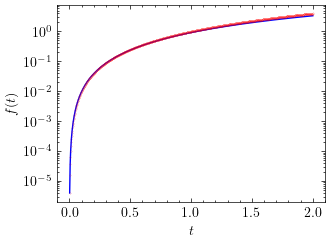

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots
from scipy import special

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.01       # time step for integration
g0 = 1.0        # initial value of g(t)
g1 = 0.1        # final value of g(t)
theta0 = 0      # central value of the parameter theta
delta = 1e-2    # finite difference for the QFI calculation
a = -1/(np.log(g1/g0))

def f(t):
    return t**2*np.abs(special.expi(1j*g0*t/np.log(1/(g0*t)))-special.expi(1j/np.log(1/(g0*t))))**2/np.log(g0*t)**2

def g(t):
    return t**2

def h(t):
    return t**2*np.log(np.log(g0*t))**2/np.log(g0*t)**2

t_values = np.linspace(0,2,1000)
t_values_end = np.linspace(0,100,1000)
plt.plot(t_values, f(t_values), color='blue')
plt.plot(t_values, g(t_values), 'r.', markersize=0.2)
plt.xlabel(r"$t$")
plt.ylabel(r"$f(t)$")
plt.yscale('log')
plt.tight_layout()
plt.show()

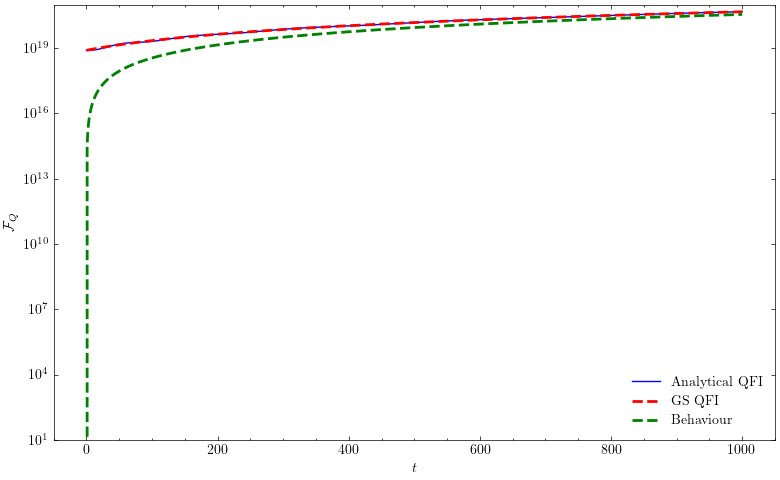

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
import scienceplots

plt.style.use(["science"])
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"

##############################################################################
# Global parameters
##############################################################################
dt = 0.1       # time step for integration
g0 = 0.1        # initial value of g(t)
theta0 = 0   # central value of the parameter theta
delta = 1e-5    # finite difference for the QFI calculation
gamma = 15     # adiabatic parameter
j = 200000000          # angular momentum quantum number
N = 2*j         # number of spins
c = 0.5*np.sqrt(0.5*N*(0.5*N+1))
##############################################################################
# Define functions with t as a parameter
##############################################################################
def g_func(t):
    #return g0/np.abs(np.sqrt(1 + 8*e*g0**2*t/(np.sqrt(2)*N*theta)))
    #return 1/(1/g0 + t/(N**2*gamma))
    return 1/(1/g0 + t/gamma)
    #return 1/np.sqrt(1+2*t/c)

def qfi_ground(N, t):
    return N*(0.5*N+1) / (g_func(t)**2)

def analytical_qfi(t):
    #return N*(0.5*N+1)*np.abs((gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j))*(g0*t+gamma)**(1j*gamma))**2
    #return N*(0.5*N+1)*np.abs(((N**2*gamma)**(1+1j*gamma*N**2)-(g0*t+gamma*N**2)**(1+1j*gamma*N**2))/(g0*(gamma*N**2-1j))*(g0*t+gamma*N**2)**(1j*gamma*N**2))**2
    term1 = 0.5*np.sqrt(0.5*N*(0.5*N+1)) * (gamma**(1+1j*gamma)-(g0*t+gamma)**(1+1j*gamma))/(g0*(gamma-1j)*(g0*t+gamma)**(1j*gamma))
    term2 = - 0.5*np.sqrt(0.5*N*(0.5*N+1)) / (g0) * (1+g0*t/gamma)**(-1j*gamma)
    return 8.0 * np.abs(term1 + term2)**2

def behaviour(t):
    return N*(0.5*N+1)*t**2/((gamma**2+1))

t_values = np.linspace(0, 1e3, 1000)
plt.figure(figsize=(8, 5))
qfi_analytical = [analytical_qfi(t) for t in t_values]
plt.plot(t_values, qfi_analytical, color='blue', label='Analytical QFI')
qfi_ground_vals = [qfi_ground(N, t) for t in t_values]
plt.plot(t_values, qfi_ground_vals, 'r--', linewidth=2, label="GS QFI")
behaviour_vals = [behaviour(t) for t in t_values]
plt.plot(t_values, behaviour_vals, 'g--', linewidth=2, label="Behaviour")
plt.xlabel(r"$t$")
plt.ylabel(r"$\mathcal{F}_Q$")    
plt.yscale('log')
plt.ylim(10, None)
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig("qfiHcLAlog.pdf", format="pdf", bbox_inches="tight")
plt.show()